<a href="https://colab.research.google.com/github/AnindoZ-lab/Predicting-housing-prices-using-the-King-County-Housing-Dataset/blob/main/successful_run_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated      lat     long  price_per_sqft  total_sqft  age  

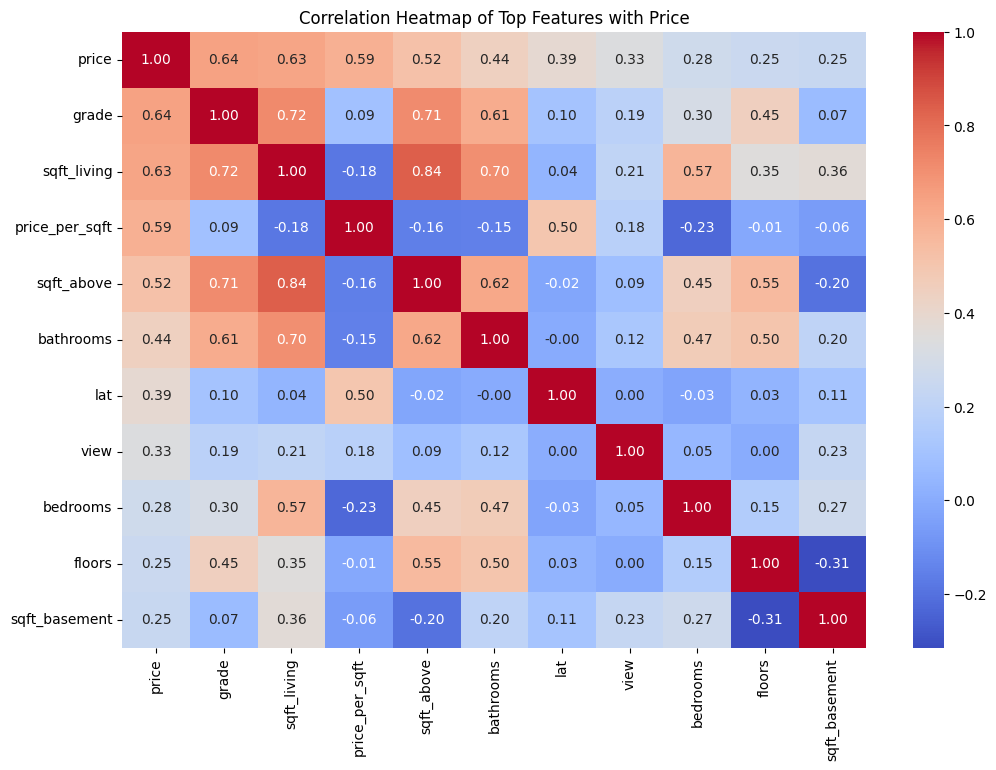

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/AnindoZ-lab/Test-1/refs/heads/main/kc_house_data_cleaned.csv?token=GHSAT0AAAAAAC2NXGJOVKMMISUQEGDM5ZHOZ2D3OVQ'
df = pd.read_csv(url)

# Display basic information
print(df.head())
print(df.info())

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
top_features = correlation_matrix['price'].abs().nlargest(11).index
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top Features with Price')
plt.show()


In [3]:
# Remove price-related features that might cause data leakage
# Assuming 'price' is the target variable, we will drop it from the features
features = df.drop(columns=['price'])

# Create a new feature: e.g., 'price_per_sqft'
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Update features to include the new feature
features = df.drop(columns=['price'])


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Prepare features and target
X = features
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Implement Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

Linear Regression R^2: 0.9209949867393593, RMSE: 74804.07468046779
Random Forest R^2: 0.9954555860315769, RMSE: 17940.59626764058


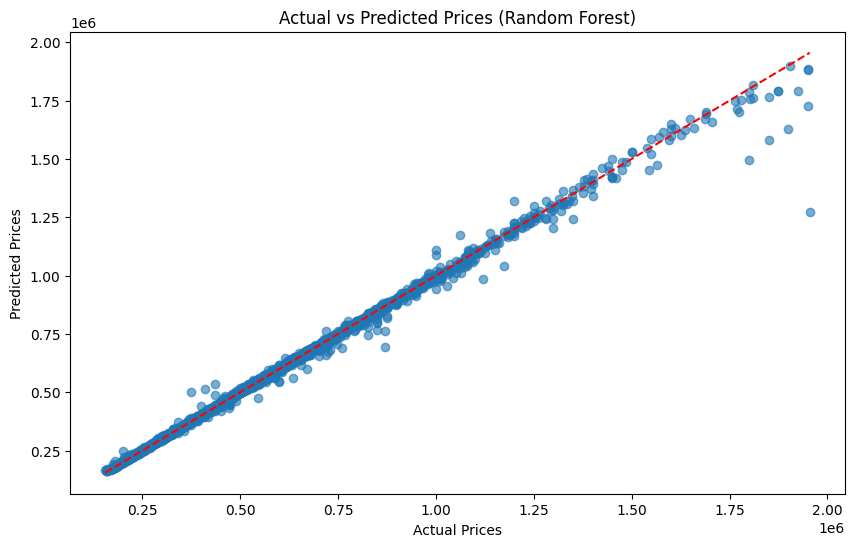

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_rf = rf_reg.predict(X_test_scaled)

# Calculate R-squared and RMSE
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'Linear Regression R^2: {r2_lin}, RMSE: {rmse_lin}')
print(f'Random Forest R^2: {r2_rf}, RMSE: {rmse_rf}')

# Scatter plot for the better performing model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


<ipython-input-7-917fe61aa225>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


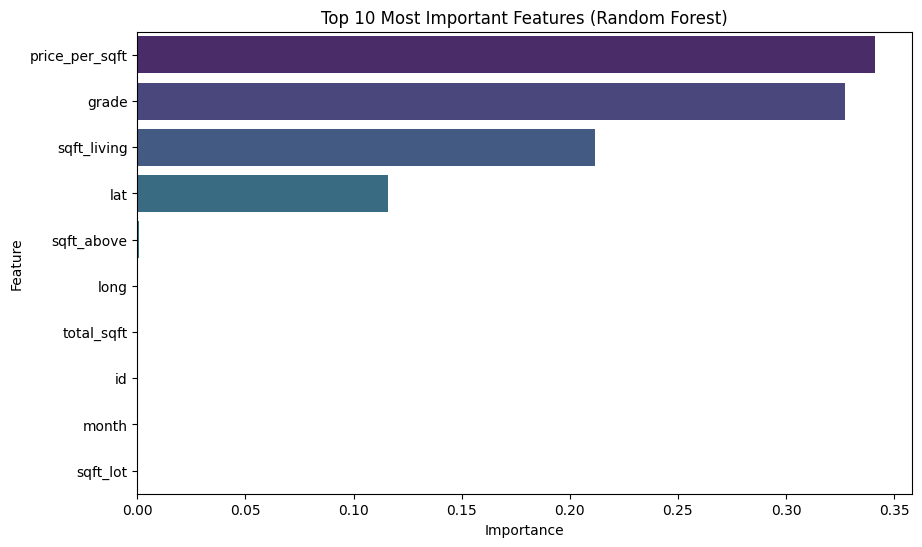

In [7]:
# Get feature importances from the Random Forest model
feature_importances = rf_reg.feature_importances_

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.show()
